<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/machine_learning/blob/main/classes/class_march_22_precision_recall/class_march_22_precision_recall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table> 

# Class del 22 de marzo Precision and recall

## Objetivo

Capacitar un clasificador binario de acuerdo a la necesidad de precisión o recuerdo. 


## Intercambio de precisión/recuperación

Para comprender esta compensación, veamos cómo `SGDClassifier` toma sus decisiones de clasificación.

Para cada instancia, calcula una puntuación basada en una función de decisión.

* Si esa puntuación es mayor que un umbral, asigna la instancia a la **clase positiva**; 
* de lo contrario, la asigna a **la clase negativa**.

La siguiente figura muestra algunos dígitos ubicados desde la puntuación más baja a la izquierda hasta la puntuación más alta a la derecha.

<img src = 'https://github.com/marco-canas/machine_learning/blob/main/classes/class_march_22_precision_recall/figura_3_3_clasificacion_binaria_mnist.jpg?raw=true'>

Supongamos que el umbral de decisión se coloca en la flecha central (entre los dos 5):  

* encontrará 4 verdaderos positivos (cincos reales) a la derecha de ese umbral y 1 falso positivo (en realidad, un 6).

Por tanto, con ese umbral, la precisión es del 80% (4 sobre 5).

Pero de los 6 cincos reales, el clasificador solo detecta 4, por lo que la recuperación es del $67 \%$ (4 de 6).

In [ ]:
4/6

* Si subes el umbral, el **falso positivo** (el 6) se convierte en un verdadero negativo, aumentando así la precisión,  

* pero un verdadero positivo se convierte en un **falso negativo** , disminuyendo el recuerdo hasta un $50\%$.

Por el contrario, bajar el umbral aumenta la recuperación y reduce la precisión.

Scikit-Learn no le permite establecer el umbral directamente, pero le da acceso a los puntajes de decisión que utiliza para hacer predicciones. 

* En lugar de llamar al método `predict()` del clasificador, 


* puede llamar a su método `decision_function()`, que devuelve un puntaje para cada instancia, y 

* luego usar cualquier umbral que desee para hacer predicciones basadas en esos puntajes:

In [1]:
%%time 

import numpy as np 
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1, as_frame = False) 

Wall time: 58 s


In [2]:
%%time 

X,y = mnist['data'], mnist['target'] 

Wall time: 0 ns


## Hacer conversión de `str` a `int64`

In [3]:
type(y[0]) 

str

In [4]:
%%time 

y = y.astype(np.int64) 

Wall time: 11 ms


In [5]:
%%time 

X_train, X_test, y_train, y_test = X[:60_000], X[60_000:], \
                                   y[:60_000], y[60_000:]

Wall time: 0 ns


## Configurar los datos para un detector de cincos 


In [6]:
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

In [7]:
%%time 

from sklearn.linear_model import SGDClassifier

Wall time: 431 ms


In [8]:
%%time 

sgd_clf = SGDClassifier(max_iter = 1000, tol = 1e-3, random_state = 42) 

Wall time: 0 ns


In [9]:
%%time

sgd_clf.fit(X_train, y_train_5) 

Wall time: 35.8 s


SGDClassifier(random_state=42)

# Función de puntajes 

$$ h_{w}(x) = \text{sign} \left(\sum_{i = 0}^{784} w \cdot x_b \right) $$

$$ h_{w}(x) = w_{0} + w_{1}x_{1} + w_{2}x_{2} + \cdots + w_{784}x_{784} $$

In [47]:
sgd_clf.coef_

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -3.62596776e-02, -1.76417277e-01,
        -1.63168549e-01, -3.13785671e-01, -1.93849815e-01,
        -3.83515821e-02, -5.62722304e-01, -1.26281300e+00,
        -5.15305803e-01, -1.33324045e+00, -1.10731477e+00,
        -3.17272179e-01, -1.05989827e-01,  0.00000000e+0

In [10]:
w = np.c_[ sgd_clf.intercept_.reshape(1,1), sgd_clf.coef_] 

In [11]:
w.shape 

(1, 785)

In [12]:
X_b = np.c_[np.ones((len(X_train),1)),X_train] 

In [48]:
X_b

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [13]:
X_b[0].shape 

(785,)

In [15]:
def puntajes_para_decidir(imagen):
    imagen = imagen.reshape(-1,1)
    return np.dot(w,imagen)

In [ ]:
X_b[0].reshape(-1,1)

In [14]:
X_b[0].reshape(-1,1).shape 

(785, 1)

In [16]:
puntajes_para_decidir(X_b[0]) 

array([[2164.22030239]])

In [18]:
y_scores = sgd_clf.decision_function([X[0]]) 
y_scores 

array([2164.22030239])

# Función de decisión personalizada

In [19]:
def funcion_decision(imagen, threshold):
    y_score = sgd_clf.decision_function([imagen])
    return y_score>threshold 

In [20]:
funcion_decision(X[0], 0)

array([ True])

In [21]:
funcion_decision(X[0], 3000) 

array([False])

In [22]:
threshold = 8000
y_predicciones_imagenes = (y_scores > threshold)
y_predicciones_imagenes 

array([False])

El `SGDClassifier` usa un umbral igual a 0, por lo que el código anterior devuelve el mismo resultado que el método `predict()` (es decir, True).

In [49]:
sgd_clf.predict([X[0]]) 

array([ True])

Subamos el umbral:

In [ ]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

Esto confirma que elevar el umbral disminuye el recuerdo.

La imagen en realidad representa un 5, y el clasificador lo detecta cuando el umbral es 0, pero lo pierde cuando el umbral aumenta a 8000.

¿Cómo se decide qué umbral usar?

Primero, use la función `cross_val_predict()` para obtener los puntajes de todas las instancias en el conjunto de entrenamiento, pero esta vez especifique que desea obtener **puntajes de decisión** en lugar de **predicciones**:

In [23]:
from sklearn.model_selection import cross_val_predict 

In [24]:
%%time 

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, \
                             method="decision_function")

Wall time: 53.4 s


Con estas puntuaciones, utilice la función `precision_recall_curve()` para calcular la precisión y la recuperación de todos los umbrales posibles:

In [55]:
%%time 

from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5,\
                                                          y_scores)

Wall time: 117 ms


In [26]:
precisions.shape

(59967,)

In [27]:
recalls.shape 

(59967,)

In [56]:
thresholds.shape 

(59966,)

Finalmente, use Matplotlib para trazar la precisión y el recuerdo(recall) como funciones del valor de umbral:

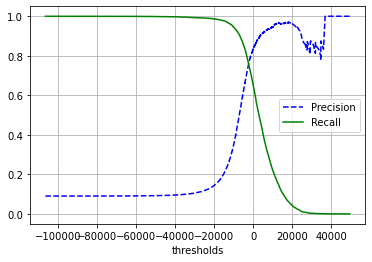

In [57]:
import matplotlib.pyplot as plt 

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.grid()  # Resalte el umbral y agregue la leyenda, la etiqueta del eje y la cuadrícula
    plt.legend() 
    plt.xlabel('thresholds')
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [50]:
precisions ==0.9

array([False, False, False, ..., False, False, False])

In [51]:
precisions 

array([0.09040123, 0.09038606, 0.09038757, ..., 1.        , 1.        ,
       1.        ])

In [52]:
np.argmax(precisions ==0.9)

57076

In [53]:
precisions[57076]

0.9

In [58]:
thresholds[57076]

3370.0692037709427


<img src = 'https://github.com/marco-canas/machine_learning/blob/main/classes/class_march_22_precision_recall/figura_3_4_threshold.jpg?raw=true'>

## NOTE

Quizás se pregunte por qué la curva de precisión es más irregular que la curva de recuperación de la figura anterior.

El motivo es que, en ocasiones, la precisión puede disminuir cuando aumenta el umbral (aunque, en general, aumentará).

Para comprender por qué, vuelva a mirar la siguiente figura y observe lo que sucede cuando comienza desde el umbral central y lo mueve solo un dígito a la derecha: 

* la precisión va de 4/5 (80 %) a 3/4 (75 %))

<img src = 'https://github.com/marco-canas/machine_learning/blob/main/classes/class_march_22_precision_recall/figura_3_3_clasificacion_binaria_mnist.jpg?raw=true'>

Por otro lado, la recuperación solo puede disminuir cuando se aumenta el umbral, lo que explica por qué su curva parece suave.

Otra forma de seleccionar una buena compensación de precisión/recuperación es graficar la precisión directamente contra la recuperación, como se muestra en la Figura siguiente (se resalta el mismo umbral que antes).

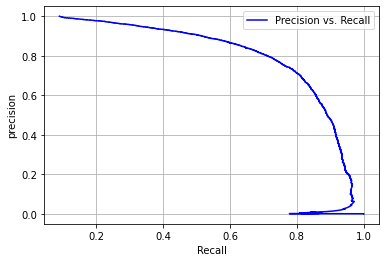

In [30]:
import matplotlib.pyplot as plt 

def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", label="Precision vs. Recall")
    plt.grid()  # Resalte el umbral y agregue la leyenda, la etiqueta del eje y la cuadrícula
    plt.legend()  
    plt.xlabel('Recall')
    plt.ylabel('precision') 
plot_precision_vs_recall(recalls, precisions)
plt.show()

<img src = 'https://github.com/marco-canas/machine_learning/blob/main/classes/class_march_22_precision_recall/figura_3_5_recall_vs_precision.jpg?raw=true'>

Puede ver que la precisión realmente comienza a caer bruscamente alrededor del $80\%$ de recuerdo.

Probablemente querrá seleccionar una compensación de precisión / recuperación justo antes de esa caída, por ejemplo, en un $60\%$ de recuperación.

Pero, por supuesto, la elección depende de su proyecto.

# Configuración del modelo para obtener una precisión del 90%

Supongamos que decide apuntar para una precisión del 90%.

Buscas en la primera gráfica (precisions vs. thresholds) y descubras que necesitas usar un umbral de aproximadamente 8,000. 

Para ser más precisos, puede buscar el umbral más bajo que le brinda al menos $ 90 \% $ de Precisión (`np.argmax()` le dará el primer índice del valor máximo, que en este caso significa el primer valor `True`):

In [59]:
a = np.array([1,3,3,3,3])

In [60]:
np.argmax(a)

1

In [33]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] 

In [34]:
threshold_90_precision

3370.0194991439557

Para hacer predicciones (en el conjunto de capacitación por ahora), en lugar de llamar al método `predict()` del clasificador, puede ejecutar este código:

In [35]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

Vamos a verificar la precisión y el recuerdo de estas predicciones:

In [36]:
from sklearn.metrics import precision_score, recall_score 

In [37]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [38]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

Como puede ver, es bastante fácil crear un clasificador con prácticamente cualquier precisión que desee: simplemente establezca un umbral suficientemente alto, y está listo.

### Sugerencia 

Si alguien dice: "Llegamos al 99% de precisión", deberías preguntar: "¿En qué recuerdo?"

## The ROC Curve

La Curva característica de Operación del Receptor (ROC) es otra herramienta común utilizada con clasificadores binarios.

Es muy similar a la curva de precisión / recuperación, pero en lugar de trazar la precisión frente a la recuperación, la curva ROC presenta la tasa positiva verdadera (otro nombre para el recall) contra la tasa positiva falsa (FPR).

El FPR es la proporción de instancias negativas que se clasifican incorrectamente como positivas. 

$$ FPR = \frac{FP}{FP + TN} $$

<img src = 'https://github.com/marco-canas/machine_learning/blob/main/classes/class_march_22_precision_recall/figura_3_2_clasificacion_binaria_matriz_confusion.jpg?raw=true'>

Para trazar la curva ROC, primero use la función `roc_curve()` para calcular el TPR y el FPR para varios valores de umbral:

In [39]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Luego, puede trazar el FPR contra el TPR utilizando MATPLOTLIB.

This code produces the plot in Figure 3-6:

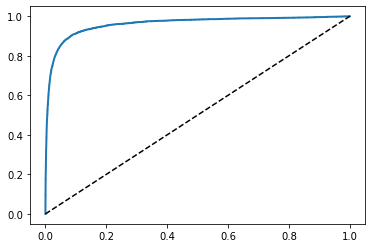

In [40]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
    [...] # Add axis labels and grid
plot_roc_curve(fpr, tpr)
plt.show()

Una vez más, hay una compensación: cuanto mayor sea el retiro (TPR), los positivos más falsos (FPR) produce el clasificador.

La línea de puntos representa la curva ROC de un clasificador puramente aleatorio; Un buen clasificador permanece tan lejos de esa línea como sea posible (hacia la esquina superior izquierda).

Una forma de comparar los clasificadores es medir el área debajo de la curva (AUC).

Un clasificador perfecto tendrá un AUC ROC igual a 1, mientras que un clasificador puramente aleatorio tendrá un AUC ROC igual a 0.5. 

Scikit-Learn proporciona una función para calcular el ROC AUC:

## Sugerencia 


Dado que la curva ROC es tan similar a la curva de precisión/recuerdo (PR), puede preguntarse cómo decidir cuál usar.

Como regla general, debe preferir la curva de PR siempre que la clase positiva sea rara o cuando se preocupe más por los falsos positivos que los falsos negativos.

De lo contrario, use la curva ROC.

Por ejemplo, mirando la curva ROC anterior (y la puntuación ROC AUC), puede pensar que el clasificador es realmente bueno.

Pero esto es principalmente porque hay pocos positivos (5s) en comparación con los negativos (no 5s).

En contraste, la curva de PR deja en claro que el clasificador tiene espacio para mejorar (la curva podría estar más cerca de la esquina superior izquierda).

Vamos a entrenar a un `RandomForestClassifier` y comparemos su curva ROC y la puntuación ROC AUC a los del Classificador SGD. 

Primero, debe obtener puntajes para cada instancia en el conjunto de entrenamiento.

Pero, debido a la forma en que funciona (ver Capítulo 7), la clase `RandomForestClassifier` no tiene un método `decision_function()`. 

En su lugar, tiene un método `predict_proba()`. 

Los clasificadores de Scikit-Learn generalmente tienen uno u otro, o ambos

El método `predict_proba()` devuelve una matriz que contiene una fila por instancia y una columna por clase, cada una con la probabilidad de que la instancia dada pertenece a la clase dada (por ejemplo, 70% de probabilidad de que la imagen represente un 5):

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
%%time 

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
method="predict_proba")

Wall time: 2min 43s


La función `roc_curve()` espera etiquetas y puntajes, pero en lugar de puntajes puede darle probabilidades de clase.

Usemos la probabilidad de clase positiva como la puntuación:

In [43]:
%%time 

y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

Ahora estás listo para trazar la curva ROC.

Es útil trazar la primera curva ROC también para ver cómo se comparan:

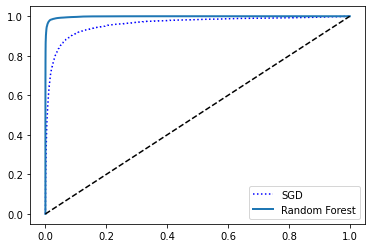

In [44]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

Como puede ver en la Figura anterior, la curva ROC del `RandomForestClassifier` se ve mucho mejor que el `SGDClassifier`: se acerca mucho a la esquina superior izquierda.

# Cómo calculo el área bajo la curva ROC 

Como resultado, su puntaje ROC AUC también es significativamente mejor:

In [45]:
from sklearn.metrics import roc_auc_score 

In [46]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

Intente medir las puntuaciones de precisión y recuperación: debe encontrar $ 99.0 \% $ Precisión y $ 86.6 \% $ Recall.

# ¿Cómo capacitar nuestro clasificador binario? 

Ahora sabe cómo capacitar a los clasificadores binarios, 

* elija la métrica adecuada para su tarea, 
* evalúe a sus clasificadores utilizando la validación cruzada, 
* seleccione la compensación de precisión / recuperación que se ajuste a sus necesidades y
* use las curvas ROC y las puntuaciones de ROC AUC para comparar varios modelos .

Ahora intentemos detectar más que solo los 5s.

# Multiclass Classification  

Whereas binary classifiers distinguish between two classes, multiclass classifiers (also called multinomial classifiers) can distinguish between more than two classes.

## Referentes  

* `sklearn.linear_model import SGDClassifier`: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html